### Collusion can emerge without memory

In [75]:
# Betrand Game
n = 2
c1 = 1
c2 = 1
a0 = 0
a1 = c1+1
a2 = c2+1
mu = 4
xi = 0.1
k = 1
    
def quantity(p,p_,a,a_,mu,a0):
    num = np.exp((a-p)/mu)
    denom = np.exp((a-p)/mu)+np.exp((a_-p_)/mu)+np.exp(a0/mu)
    return num/denom
  
def profit(p,c,q):
    return (p-c)*q

for p in np.linspace(0.1,100,1000):
    #print(p, profit(p,c1,quantity(p,p,a1,a2,mu,a0)), profit(p,c2,quantity(p,p,a2,a1,mu,a0)))
    pass
pm = 7.2
pc = 1.0

In [104]:
import random
import numpy as np

# initialize Boltzmann Q-learning parameters
gamma = 0.95
alpha = 0.001
initial_temperature = 1.0
temperature_decay = 0.9999
min_temperature = 0.01
temperature = initial_temperature

initial_eps = 1.0
eps_decay = 0.9999
min_eps = 0.01
eps = initial_eps

# define the Boltzmann action selection function
def boltzmann_action_selection(Q, state, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state])
    logits = (Q[state] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    # select an action using the computed probabilities
    action = np.random.choice(range(len(probs)), p=probs)
    return action

# initialize the Q-table
num_states = 1
num_actions = 10
Q1 = np.ones((num_states, num_actions))
Q2 = np.ones((num_states, num_actions))
p1_history = []
p2_history = []
action2price = np.linspace(pc*0.8,pm*1.2,100)

In [105]:

# run Boltzmann Q-learning for a fixed number of episodes
num_episodes = 100000
for episode in range(num_episodes):
    # initialize the state
    state1 = 0
    state2 = 0

    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action1 = boltzmann_action_selection(Q1, state1,temperature)
    else:
        action1 = np.random.choice(range(num_actions))

    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action2 = boltzmann_action_selection(Q2, state2,temperature)
    else:
        action2 = np.random.choice(range(num_actions))

    price1 = action2price[action1]
    price2 = action2price[action2]

    # take the selected action and observe the next state and reward
    next_state1 = state1
    next_state2 = state2

    # rewards
    reward1 = profit(price1,c1,quantity(price1,price2,a1,a2,mu,a0))
    reward2 = profit(price2,c2,quantity(price2,price1,a2,a1,mu,a0))

    # update the Q-value for the selected action in the current state
    Q1[state1][action1] =  (1-alpha)*Q1[state1][action1] + alpha * (reward1 + gamma * np.max(Q1[next_state1]))
    Q2[state2][action2] =  (1-alpha)*Q2[state2][action2] + alpha * (reward2 + gamma * np.max(Q2[next_state2]))

    # move to the next state
    state1 = next_state1
    state2 = next_state2

    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    eps = max(min_eps, eps * eps_decay)

    print(price1, price2, temperature, eps)
    
    p1_history.append(price1)
    p2_history.append(price2)

1.0375757575757576 1.1167676767676769 0.9999 0.9999
1.512727272727273 0.9583838383838384 0.9998000100000001 0.9998000100000001
0.9583838383838384 0.9583838383838384 0.9997000299990001 0.9997000299990001
1.512727272727273 1.512727272727273 0.9996000599960002 0.9996000599960002
1.2751515151515154 1.1959595959595961 0.9995000999900007 0.9995000999900007
0.9583838383838384 1.1167676767676769 0.9994001499800017 0.9994001499800017
1.1959595959595961 1.2751515151515154 0.9993002099650037 0.9993002099650037
1.1959595959595961 1.3543434343434344 0.9992002799440072 0.9992002799440072
1.1959595959595961 0.9583838383838384 0.9991003599160128 0.9991003599160128
0.9583838383838384 1.0375757575757576 0.9990004498800211 0.9990004498800211
1.3543434343434344 1.512727272727273 0.9989005498350332 0.9989005498350332
1.0375757575757576 1.1959595959595961 0.9988006597800497 0.9988006597800497
0.9583838383838384 1.0375757575757576 0.9987007797140718 0.9987007797140718
0.8 1.0375757575757576 0.998600909636100

0.8 1.4335353535353537 0.689410360835819 0.689410360835819
1.0375757575757576 0.8791919191919193 0.6893414197997354 0.6893414197997354
1.1167676767676769 1.4335353535353537 0.6892724856577555 0.6892724856577555
1.4335353535353537 0.8 0.6892035584091897 0.6892035584091897
1.512727272727273 0.9583838383838384 0.6891346380533487 0.6891346380533487
1.1959595959595961 1.1167676767676769 0.6890657245895434 0.6890657245895434
1.1167676767676769 0.8 0.6889968180170845 0.6889968180170845
1.0375757575757576 1.2751515151515154 0.6889279183352828 0.6889279183352828
1.2751515151515154 0.8 0.6888590255434492 0.6888590255434492
1.2751515151515154 1.3543434343434344 0.6887901396408949 0.6887901396408949
0.8791919191919193 1.4335353535353537 0.6887212606269307 0.6887212606269307
1.4335353535353537 1.3543434343434344 0.6886523885008681 0.6886523885008681
0.8 0.9583838383838384 0.688583523262018 0.688583523262018
0.8791919191919193 1.1959595959595961 0.6885146649096918 0.6885146649096918
1.19595959595959

1.1167676767676769 1.1167676767676769 0.6179028270908045 0.6179028270908045
1.512727272727273 1.1167676767676769 0.6178410368080954 0.6178410368080954
1.0375757575757576 0.8 0.6177792527044146 0.6177792527044146
0.8 1.2751515151515154 0.6177174747791442 0.6177174747791442
1.512727272727273 1.1959595959595961 0.6176557030316663 0.6176557030316663
0.8791919191919193 0.8 0.6175939374613632 0.6175939374613632
1.0375757575757576 0.8 0.6175321780676171 0.6175321780676171
1.4335353535353537 1.1167676767676769 0.6174704248498103 0.6174704248498103
0.8791919191919193 1.0375757575757576 0.6174086778073253 0.6174086778073253
1.1959595959595961 1.3543434343434344 0.6173469369395446 0.6173469369395446
1.1167676767676769 1.3543434343434344 0.6172852022458506 0.6172852022458506
0.9583838383838384 1.3543434343434344 0.617223473725626 0.617223473725626
0.8 1.1959595959595961 0.6171617513782535 0.6171617513782535
1.1959595959595961 1.1959595959595961 0.6171000352031156 0.6171000352031156
0.8791919191919

0.9583838383838384 1.2751515151515154 0.5924278552101082 0.5924278552101082
1.3543434343434344 0.8 0.5923686124245872 0.5923686124245872
0.8791919191919193 0.8 0.5923093755633447 0.5923093755633447
1.1959595959595961 1.3543434343434344 0.5922501446257884 0.5922501446257884
1.0375757575757576 1.512727272727273 0.5921909196113259 0.5921909196113259
1.0375757575757576 1.1959595959595961 0.5921317005193647 0.5921317005193647
1.2751515151515154 1.0375757575757576 0.5920724873493127 0.5920724873493127
1.1959595959595961 1.0375757575757576 0.5920132801005779 0.5920132801005779
0.8 1.0375757575757576 0.5919540787725678 0.5919540787725678
0.9583838383838384 1.1167676767676769 0.5918948833646905 0.5918948833646905
1.1959595959595961 1.4335353535353537 0.591835693876354 0.591835693876354
0.8791919191919193 1.0375757575757576 0.5917765103069664 0.5917765103069664
1.2751515151515154 1.4335353535353537 0.5917173326559357 0.5917173326559357
1.2751515151515154 0.8791919191919193 0.5916581609226701 0.5

0.8 1.1167676767676769 0.5271173829833373 0.5271173829833373
1.1167676767676769 0.9583838383838384 0.527064671245039 0.527064671245039
1.1167676767676769 1.3543434343434344 0.5270119647779145 0.5270119647779145
1.4335353535353537 1.1167676767676769 0.5269592635814366 0.5269592635814366
1.3543434343434344 1.4335353535353537 0.5269065676550785 0.5269065676550785
1.0375757575757576 1.0375757575757576 0.526853876998313 0.526853876998313
1.2751515151515154 0.8791919191919193 0.5268011916106131 0.5268011916106131
1.0375757575757576 1.512727272727273 0.5267485114914521 0.5267485114914521
1.1959595959595961 1.512727272727273 0.526695836640303 0.526695836640303
1.1959595959595961 1.512727272727273 0.5266431670566389 0.5266431670566389
1.4335353535353537 0.8 0.5265905027399332 0.5265905027399332
1.512727272727273 1.4335353535353537 0.5265378436896593 0.5265378436896593
1.4335353535353537 1.0375757575757576 0.5264851899052904 0.5264851899052904
1.3543434343434344 1.512727272727273 0.5264325413862

1.3543434343434344 1.2751515151515154 0.4719238941980712 0.4719238941980712
0.8 1.2751515151515154 0.4718767018086514 0.4718767018086514
0.8 1.3543434343434344 0.4718295141384705 0.4718295141384705
1.0375757575757576 1.4335353535353537 0.4717823311870567 0.4717823311870567
0.8 1.3543434343434344 0.471735152953938 0.471735152953938
1.4335353535353537 1.4335353535353537 0.4716879794386426 0.4716879794386426
1.0375757575757576 0.9583838383838384 0.47164081064069874 0.47164081064069874
0.8 0.9583838383838384 0.47159364655963465 0.47159364655963465
1.1959595959595961 1.512727272727273 0.4715464871949787 0.4715464871949787
0.8791919191919193 1.512727272727273 0.4714993325462592 0.4714993325462592
1.1959595959595961 1.4335353535353537 0.4714521826130046 0.4714521826130046
0.9583838383838384 0.9583838383838384 0.4714050373947433 0.4714050373947433
0.9583838383838384 0.8 0.4713578968910038 0.4713578968910038
1.4335353535353537 1.2751515151515154 0.47131076110131476 0.47131076110131476
0.8 0.879

0.8791919191919193 1.1959595959595961 0.42297465335908296 0.42297465335908296
0.9583838383838384 1.1959595959595961 0.42293235589374706 0.42293235589374706
1.3543434343434344 1.2751515151515154 0.4228900626581577 0.4228900626581577
1.1959595959595961 1.0375757575757576 0.4228477736518919 0.4228477736518919
1.1167676767676769 1.1167676767676769 0.42280548887452674 0.42280548887452674
1.2751515151515154 1.3543434343434344 0.4227632083256393 0.4227632083256393
1.0375757575757576 0.9583838383838384 0.42272093200480676 0.42272093200480676
0.8791919191919193 1.2751515151515154 0.4226786599116063 0.4226786599116063
1.4335353535353537 0.8 0.42263639204561515 0.42263639204561515
0.8791919191919193 1.3543434343434344 0.4225941284064106 0.4225941284064106
1.0375757575757576 0.8 0.42255186899356995 0.42255186899356995
1.1167676767676769 1.3543434343434344 0.42250961380667057 0.42250961380667057
1.512727272727273 0.9583838383838384 0.4224673628452899 0.4224673628452899
1.0375757575757576 1.11676767

1.2751515151515154 1.1167676767676769 0.3924890017711602 0.3924890017711602
1.2751515151515154 1.1959595959595961 0.3924497528709831 0.3924497528709831
0.8 1.2751515151515154 0.39241050789569604 0.39241050789569604
0.8 1.4335353535353537 0.3923712668449065 0.3923712668449065
1.2751515151515154 0.8791919191919193 0.392332029718222 0.392332029718222
1.1167676767676769 1.3543434343434344 0.3922927965152502 0.3922927965152502
1.512727272727273 1.2751515151515154 0.3922535672355987 0.3922535672355987
1.3543434343434344 0.8791919191919193 0.3922143418788751 0.3922143418788751
1.1959595959595961 0.9583838383838384 0.3921751204446872 0.3921751204446872
1.4335353535353537 0.9583838383838384 0.3921359029326428 0.3921359029326428
1.512727272727273 1.3543434343434344 0.39209668934234954 0.39209668934234954
1.3543434343434344 1.1959595959595961 0.3920574796734153 0.3920574796734153
1.512727272727273 1.0375757575757576 0.39201827392544797 0.39201827392544797
1.512727272727273 0.9583838383838384 0.39

1.512727272727273 1.3543434343434344 0.3740562213956902 0.3740562213956902
1.512727272727273 1.2751515151515154 0.3740188157735507 0.3740188157735507
1.2751515151515154 0.8 0.3739814138919733 0.3739814138919733
1.1959595959595961 1.1167676767676769 0.3739440157505841 0.3739440157505841
1.512727272727273 1.512727272727273 0.37390662134900904 0.37390662134900904
1.0375757575757576 1.2751515151515154 0.37386923068687417 0.37386923068687417
1.1167676767676769 1.512727272727273 0.37383184376380546 0.37383184376380546
1.4335353535353537 1.1959595959595961 0.3737944605794291 0.3737944605794291
1.1959595959595961 1.0375757575757576 0.3737570811333712 0.3737570811333712
1.0375757575757576 1.3543434343434344 0.37371970542525784 0.37371970542525784
0.8 1.512727272727273 0.3736823334547153 0.3736823334547153
0.8791919191919193 0.9583838383838384 0.3736449652213698 0.3736449652213698
1.3543434343434344 1.512727272727273 0.37360760072484767 0.37360760072484767
0.9583838383838384 1.512727272727273 0.

1.512727272727273 1.3543434343434344 0.33586212226522244 0.33586212226522244
1.3543434343434344 0.8791919191919193 0.3358285360529959 0.3358285360529959
1.512727272727273 1.1167676767676769 0.3357949531993906 0.3357949531993906
1.3543434343434344 1.0375757575757576 0.33576137370407066 0.33576137370407066
1.2751515151515154 1.3543434343434344 0.33572779756670024 0.33572779756670024
0.8 1.4335353535353537 0.33569422478694355 0.33569422478694355
1.1959595959595961 0.9583838383838384 0.3356606553644649 0.3356606553644649
0.8 0.9583838383838384 0.3356270892989284 0.3356270892989284
1.0375757575757576 1.2751515151515154 0.3355935265899985 0.3355935265899985
1.2751515151515154 1.1959595959595961 0.33555996723733955 0.33555996723733955
1.2751515151515154 0.9583838383838384 0.33552641124061583 0.33552641124061583
1.1167676767676769 0.9583838383838384 0.3354928585994918 0.3354928585994918
0.8791919191919193 1.1167676767676769 0.3354593093136318 0.3354593093136318
0.8 1.3543434343434344 0.3354257

0.8791919191919193 1.2751515151515154 0.30232284362120504 0.30232284362120504
1.0375757575757576 1.0375757575757576 0.30229261133684293 0.30229261133684293
1.1167676767676769 1.1167676767676769 0.30226238207570927 0.30226238207570927
1.512727272727273 1.4335353535353537 0.3022321558375017 0.3022321558375017
1.3543434343434344 0.8 0.3022019326219179 0.3022019326219179
1.1959595959595961 1.3543434343434344 0.3021717124286557 0.3021717124286557
0.9583838383838384 1.4335353535353537 0.30214149525741285 0.30214149525741285
1.1959595959595961 1.512727272727273 0.3021112811078871 0.3021112811078871
1.2751515151515154 0.9583838383838384 0.3020810699797763 0.3020810699797763
1.4335353535353537 1.2751515151515154 0.3020508618727783 0.3020508618727783
1.4335353535353537 1.512727272727273 0.302020656786591 0.302020656786591
1.4335353535353537 1.1167676767676769 0.30199045472091235 0.30199045472091235
1.3543434343434344 0.8 0.30196025567544027 0.30196025567544027
1.512727272727273 1.037575757575757

1.1167676767676769 1.3543434343434344 0.2758041120237062 0.2758041120237062
0.9583838383838384 1.2751515151515154 0.2757765316125038 0.2757765316125038
1.0375757575757576 1.0375757575757576 0.27574895395934257 0.27574895395934257
1.4335353535353537 1.1959595959595961 0.2757213790639466 0.2757213790639466
1.2751515151515154 1.2751515151515154 0.27569380692604023 0.27569380692604023
1.1959595959595961 1.4335353535353537 0.27566623754534764 0.27566623754534764
1.512727272727273 1.512727272727273 0.2756386709215931 0.2756386709215931
0.8 1.512727272727273 0.275611107054501 0.275611107054501
1.3543434343434344 1.3543434343434344 0.2755835459437955 0.2755835459437955
1.4335353535353537 1.1959595959595961 0.27555598758920113 0.27555598758920113
0.8 0.9583838383838384 0.2755284319904422 0.2755284319904422
1.0375757575757576 1.1167676767676769 0.27550087914724314 0.27550087914724314
1.4335353535353537 1.0375757575757576 0.2754733290593284 0.2754733290593284
0.9583838383838384 1.512727272727273 

1.512727272727273 0.8 0.25130974556000596 0.25130974556000596
0.8 1.512727272727273 0.25128461458545 0.25128461458545
1.512727272727273 1.1167676767676769 0.25125948612399146 0.25125948612399146
1.512727272727273 0.8 0.2512343601753791 0.2512343601753791
1.0375757575757576 1.1959595959595961 0.2512092367393616 0.2512092367393616
0.8791919191919193 1.0375757575757576 0.2511841158156876 0.2511841158156876
1.4335353535353537 1.512727272727273 0.251158997404106 0.251158997404106
0.8 0.8 0.2511338815043656 0.2511338815043656
1.3543434343434344 1.3543434343434344 0.2511087681162152 0.2511087681162152
1.1959595959595961 1.4335353535353537 0.25108365723940357 0.25108365723940357
0.8 1.512727272727273 0.2510585488736796 0.2510585488736796
0.8 1.512727272727273 0.25103344301879227 0.25103344301879227
1.1167676767676769 1.3543434343434344 0.2510083396744904 0.2510083396744904
1.3543434343434344 1.1167676767676769 0.2509832388405229 0.2509832388405229
1.1167676767676769 1.1167676767676769 0.250958

1.512727272727273 1.3543434343434344 0.22954100718334602 0.22954100718334602
1.1167676767676769 1.4335353535353537 0.22951805308262768 0.22951805308262768
1.0375757575757576 1.0375757575757576 0.22949510127731942 0.22949510127731942
0.8 1.0375757575757576 0.22947215176719168 0.22947215176719168
0.8 1.4335353535353537 0.22944920455201498 0.22944920455201498
0.8 1.0375757575757576 0.22942625963155977 0.22942625963155977
1.0375757575757576 1.3543434343434344 0.22940331700559663 0.22940331700559663
1.1959595959595961 1.512727272727273 0.22938037667389607 0.22938037667389607
0.8791919191919193 1.512727272727273 0.22935743863622868 0.22935743863622868
0.8791919191919193 1.3543434343434344 0.22933450289236507 0.22933450289236507
1.1959595959595961 0.8 0.22931156944207584 0.22931156944207584
1.2751515151515154 1.2751515151515154 0.22928863828513163 0.22928863828513163
1.512727272727273 1.1959595959595961 0.22926570942130312 0.22926570942130312
1.1959595959595961 1.1959595959595961 0.2292427828

0.8 0.8 0.20861217658586984 0.20861217658586984
1.4335353535353537 1.1959595959595961 0.20859131536821124 0.20859131536821124
0.8 1.1167676767676769 0.20857045623667442 0.20857045623667442
1.4335353535353537 1.4335353535353537 0.20854959919105076 0.20854959919105076
1.2751515151515154 1.3543434343434344 0.20852874423113166 0.20852874423113166
0.9583838383838384 1.1167676767676769 0.20850789135670855 0.20850789135670855
1.4335353535353537 1.3543434343434344 0.2084870405675729 0.2084870405675729
0.8791919191919193 1.1959595959595961 0.20846619186351614 0.20846619186351614
0.8791919191919193 1.512727272727273 0.20844534524432978 0.20844534524432978
1.4335353535353537 0.9583838383838384 0.20842450070980537 0.20842450070980537
1.3543434343434344 1.4335353535353537 0.2084036582597344 0.2084036582597344
1.0375757575757576 1.0375757575757576 0.20838281789390842 0.20838281789390842
1.4335353535353537 0.8791919191919193 0.20836197961211902 0.20836197961211902
0.9583838383838384 1.433535353535353

1.2751515151515154 0.8 0.19266885508123827 0.19266885508123827
1.4335353535353537 1.2751515151515154 0.19264958819573014 0.19264958819573014
0.8791919191919193 1.2751515151515154 0.19263032323691057 0.19263032323691057
0.9583838383838384 1.512727272727273 0.19261106020458688 0.19261106020458688
0.8791919191919193 1.1959595959595961 0.1925917990985664 0.1925917990985664
1.2751515151515154 1.4335353535353537 0.19257253991865655 0.19257253991865655
0.8 1.4335353535353537 0.1925532826646647 0.1925532826646647
1.4335353535353537 1.2751515151515154 0.19253402733639824 0.19253402733639824
1.512727272727273 1.4335353535353537 0.1925147739336646 0.1925147739336646
1.512727272727273 1.1959595959595961 0.19249552245627122 0.19249552245627122
1.0375757575757576 1.1959595959595961 0.19247627290402558 0.19247627290402558
1.1959595959595961 1.2751515151515154 0.19245702527673517 0.19245702527673517
1.1959595959595961 1.1959595959595961 0.1924377795742075 0.1924377795742075
0.8 1.1167676767676769 0.19

1.3543434343434344 1.1959595959595961 0.18439325702540635 0.18439325702540635
1.512727272727273 1.4335353535353537 0.18437481769970382 0.18437481769970382
0.8791919191919193 1.512727272727273 0.18435638021793385 0.18435638021793385
1.3543434343434344 1.4335353535353537 0.18433794457991207 0.18433794457991207
0.8 1.1167676767676769 0.18431951078545408 0.18431951078545408
0.8791919191919193 0.8791919191919193 0.18430107883437555 0.18430107883437555
1.4335353535353537 0.8 0.1842826487264921 0.1842826487264921
1.2751515151515154 1.512727272727273 0.18426422046161947 0.18426422046161947
0.8791919191919193 1.512727272727273 0.1842457940395733 0.1842457940395733
1.512727272727273 1.1167676767676769 0.18422736946016935 0.18422736946016935
1.4335353535353537 0.8791919191919193 0.18420894672322333 0.18420894672322333
1.2751515151515154 1.3543434343434344 0.184190525828551 0.184190525828551
0.8791919191919193 1.0375757575757576 0.18417210677596815 0.18417210677596815
1.2751515151515154 1.35434343

1.4335353535353537 1.4335353535353537 0.17211576420413405 0.17211576420413405
0.8791919191919193 1.1959595959595961 0.17209855262771365 0.17209855262771365
1.3543434343434344 1.4335353535353537 0.17208134277245088 0.17208134277245088
1.2751515151515154 1.4335353535353537 0.17206413463817363 0.17206413463817363
1.1959595959595961 1.4335353535353537 0.17204692822470982 0.17204692822470982
1.512727272727273 1.3543434343434344 0.17202972353188736 0.17202972353188736
1.4335353535353537 1.4335353535353537 0.17201252055953417 0.17201252055953417
1.512727272727273 1.1167676767676769 0.17199531930747822 0.17199531930747822
1.3543434343434344 1.1167676767676769 0.17197811977554747 0.17197811977554747
0.8 1.3543434343434344 0.1719609219635699 0.1719609219635699
1.1167676767676769 1.2751515151515154 0.17194372587137355 0.17194372587137355
1.3543434343434344 1.3543434343434344 0.17192653149878642 0.17192653149878642
1.3543434343434344 0.8 0.17190933884563656 0.17190933884563656
0.9583838383838384 1

1.4335353535353537 1.0375757575757576 0.1626929176123298 0.1626929176123298
1.2751515151515154 0.8 0.16267664832056855 0.16267664832056855
1.4335353535353537 1.1959595959595961 0.1626603806557365 0.1626603806557365
1.3543434343434344 1.1167676767676769 0.16264411461767092 0.16264411461767092
0.8791919191919193 1.1959595959595961 0.16262785020620915 0.16262785020620915
1.3543434343434344 1.4335353535353537 0.16261158742118853 0.16261158742118853
1.4335353535353537 1.3543434343434344 0.1625953262624464 0.1625953262624464
1.1959595959595961 1.512727272727273 0.16257906672982017 0.16257906672982017
1.512727272727273 1.512727272727273 0.1625628088231472 0.1625628088231472
0.9583838383838384 1.3543434343434344 0.16254655254226488 0.16254655254226488
0.9583838383838384 1.1959595959595961 0.16253029788701065 0.16253029788701065
1.4335353535353537 1.1959595959595961 0.16251404485722196 0.16251404485722196
1.512727272727273 1.3543434343434344 0.16249779345273624 0.16249779345273624
1.43353535353

1.3543434343434344 0.8 0.15618831751844456 0.15618831751844456
1.512727272727273 1.3543434343434344 0.15617269868669273 0.15617269868669273
1.4335353535353537 1.3543434343434344 0.15615708141682405 0.15615708141682405
0.9583838383838384 1.2751515151515154 0.15614146570868237 0.15614146570868237
0.8791919191919193 1.1959595959595961 0.1561258515621115 0.1561258515621115
1.1167676767676769 1.4335353535353537 0.1561102389769553 0.1561102389769553
1.4335353535353537 1.512727272727273 0.15609462795305762 0.15609462795305762
1.512727272727273 1.512727272727273 0.15607901849026232 0.15607901849026232
1.512727272727273 1.3543434343434344 0.1560634105884133 0.1560634105884133
1.0375757575757576 1.1959595959595961 0.15604780424735445 0.15604780424735445
1.2751515151515154 1.3543434343434344 0.15603219946692973 0.15603219946692973
0.8791919191919193 1.1167676767676769 0.15601659624698302 0.15601659624698302
1.1167676767676769 1.2751515151515154 0.15600099458735833 0.15600099458735833
1.1959595959

1.1167676767676769 0.9583838383838384 0.14924065953608376 0.14924065953608376
0.9583838383838384 1.1167676767676769 0.14922573547013016 0.14922573547013016
1.2751515151515154 0.9583838383838384 0.14921081289658314 0.14921081289658314
1.1167676767676769 1.1959595959595961 0.14919589181529347 0.14919589181529347
1.4335353535353537 1.2751515151515154 0.14918097222611193 0.14918097222611193
1.3543434343434344 1.2751515151515154 0.1491660541288893 0.1491660541288893
1.512727272727273 1.0375757575757576 0.14915113752347642 0.14915113752347642
1.512727272727273 1.2751515151515154 0.14913622240972407 0.14913622240972407
1.4335353535353537 1.512727272727273 0.14912130878748311 0.14912130878748311
0.8791919191919193 1.1959595959595961 0.14910639665660436 0.14910639665660436
1.3543434343434344 1.3543434343434344 0.1490914860169387 0.1490914860169387
1.1959595959595961 1.3543434343434344 0.149076576868337 0.149076576868337
1.512727272727273 0.8791919191919193 0.14906166921065017 0.1490616692106501

1.4335353535353537 1.4335353535353537 0.14039461167019884 0.14039461167019884
0.8 1.1167676767676769 0.14038057220903183 0.14038057220903183
1.512727272727273 1.0375757575757576 0.14036653415181094 0.14036653415181094
0.9583838383838384 1.512727272727273 0.14035249749839576 0.14035249749839576
1.2751515151515154 0.8 0.14033846224864593 0.14033846224864593
1.1167676767676769 1.2751515151515154 0.14032442840242107 0.14032442840242107
1.4335353535353537 1.0375757575757576 0.14031039595958084 0.14031039595958084
1.2751515151515154 1.512727272727273 0.14029636491998487 0.14029636491998487
1.2751515151515154 1.512727272727273 0.14028233528349288 0.14028233528349288
1.3543434343434344 1.2751515151515154 0.14026830704996454 0.14026830704996454
1.4335353535353537 0.8791919191919193 0.14025428021925954 0.14025428021925954
1.512727272727273 1.512727272727273 0.1402402547912376 0.1402402547912376
1.4335353535353537 1.3543434343434344 0.1402262307657585 0.1402262307657585
0.9583838383838384 0.8 0.1

1.1959595959595961 1.512727272727273 0.1282078239832881 0.1282078239832881
1.1959595959595961 1.4335353535353537 0.12819500320088975 0.12819500320088975
1.3543434343434344 0.9583838383838384 0.12818218370056966 0.12818218370056966
1.0375757575757576 1.512727272727273 0.12816936548219962 0.12816936548219962
1.0375757575757576 1.512727272727273 0.1281565485456514 0.1281565485456514
1.2751515151515154 1.512727272727273 0.12814373289079684 0.12814373289079684
1.1959595959595961 1.512727272727273 0.12813091851750777 0.12813091851750777
0.9583838383838384 1.512727272727273 0.12811810542565602 0.12811810542565602
1.0375757575757576 1.1959595959595961 0.12810529361511347 0.12810529361511347
1.512727272727273 1.3543434343434344 0.12809248308575197 0.12809248308575197
1.512727272727273 1.2751515151515154 0.1280796738374434 0.1280796738374434
1.1959595959595961 1.3543434343434344 0.12806686587005967 0.12806686587005967
1.4335353535353537 1.4335353535353537 0.12805405918347265 0.12805405918347265


1.512727272727273 0.9583838383838384 0.11844498745206451 0.11844498745206451
1.1959595959595961 1.512727272727273 0.1184331429533193 0.1184331429533193
1.4335353535353537 1.512727272727273 0.11842129963902397 0.11842129963902397
1.2751515151515154 1.3543434343434344 0.11840945750906007 0.11840945750906007
1.2751515151515154 1.2751515151515154 0.11839761656330916 0.11839761656330916
1.512727272727273 1.4335353535353537 0.11838577680165283 0.11838577680165283
1.512727272727273 1.3543434343434344 0.11837393822397266 0.11837393822397266
1.512727272727273 1.1959595959595961 0.11836210083015027 0.11836210083015027
1.4335353535353537 1.4335353535353537 0.11835026462006726 0.11835026462006726
1.512727272727273 1.512727272727273 0.11833842959360526 0.11833842959360526
1.512727272727273 1.512727272727273 0.1183265957506459 0.1183265957506459
1.4335353535353537 1.512727272727273 0.11831476309107083 0.11831476309107083
1.2751515151515154 1.2751515151515154 0.11830293161476173 0.11830293161476173
1

1.2751515151515154 0.9583838383838384 0.11052537710400553 0.11052537710400553
1.3543434343434344 1.512727272727273 0.11051432456629513 0.11051432456629513
1.4335353535353537 1.512727272727273 0.11050327313383851 0.11050327313383851
1.4335353535353537 1.2751515151515154 0.11049222280652513 0.11049222280652513
1.512727272727273 1.512727272727273 0.11048117358424447 0.11048117358424447
1.512727272727273 1.3543434343434344 0.11047012546688605 0.11047012546688605
1.3543434343434344 1.1167676767676769 0.11045907845433936 0.11045907845433936
1.1959595959595961 1.1167676767676769 0.11044803254649392 0.11044803254649392
1.512727272727273 1.0375757575757576 0.11043698774323928 0.11043698774323928
1.1167676767676769 1.512727272727273 0.11042594404446496 0.11042594404446496
1.512727272727273 1.3543434343434344 0.11041490145006051 0.11041490145006051
1.3543434343434344 1.512727272727273 0.1104038599599155 0.1104038599599155
1.1167676767676769 1.1167676767676769 0.11039281957391951 0.110392819573919

1.512727272727273 1.512727272727273 0.10145758925955686 0.10145758925955686
1.3543434343434344 1.1167676767676769 0.10144744350063091 0.10144744350063091
1.512727272727273 1.512727272727273 0.10143729875628085 0.10143729875628085
1.512727272727273 1.1959595959595961 0.10142715502640523 0.10142715502640523
1.3543434343434344 1.4335353535353537 0.1014170123109026 0.1014170123109026
1.512727272727273 1.512727272727273 0.1014068706096715 0.1014068706096715
1.512727272727273 1.1959595959595961 0.10139672992261053 0.10139672992261053
1.4335353535353537 1.3543434343434344 0.10138659024961827 0.10138659024961827
1.4335353535353537 1.1167676767676769 0.1013764515905933 0.1013764515905933
1.512727272727273 0.8 0.10136631394543424 0.10136631394543424
0.8 1.2751515151515154 0.1013561773140397 0.1013561773140397
0.8791919191919193 1.4335353535353537 0.1013460416963083 0.1013460416963083
1.1959595959595961 1.512727272727273 0.10133590709213867 0.10133590709213867
1.3543434343434344 1.512727272727273

1.4335353535353537 1.512727272727273 0.09241933463403294 0.09241933463403294
1.3543434343434344 1.4335353535353537 0.09241009270056955 0.09241009270056955
0.8 1.2751515151515154 0.0924008516912995 0.0924008516912995
1.512727272727273 1.4335353535353537 0.09239161160613037 0.09239161160613037
1.512727272727273 1.512727272727273 0.09238237244496976 0.09238237244496976
1.512727272727273 1.512727272727273 0.09237313420772526 0.09237313420772526
1.512727272727273 1.3543434343434344 0.09236389689430449 0.09236389689430449
1.512727272727273 1.4335353535353537 0.09235466050461506 0.09235466050461506
1.512727272727273 1.512727272727273 0.0923454250385646 0.0923454250385646
1.512727272727273 1.512727272727273 0.09233619049606075 0.09233619049606075
1.512727272727273 1.4335353535353537 0.09232695687701115 0.09232695687701115
1.512727272727273 1.512727272727273 0.09231772418132345 0.09231772418132345
1.512727272727273 1.512727272727273 0.09230849240890532 0.09230849240890532
1.3543434343434344 1.5

1.3543434343434344 1.4335353535353537 0.08344027410176222 0.08344027410176222
1.2751515151515154 1.3543434343434344 0.08343193007435204 0.08343193007435204
1.512727272727273 1.512727272727273 0.0834235868813446 0.0834235868813446
1.512727272727273 1.3543434343434344 0.08341524452265647 0.08341524452265647
1.512727272727273 1.1167676767676769 0.0834069029982042 0.0834069029982042
1.1167676767676769 1.512727272727273 0.08339856230790439 0.08339856230790439
1.512727272727273 1.512727272727273 0.0833902224516736 0.0833902224516736
0.8 1.512727272727273 0.08338188342942844 0.08338188342942844
1.4335353535353537 1.2751515151515154 0.0833735452410855 0.0833735452410855
1.512727272727273 1.512727272727273 0.0833652078865614 0.0833652078865614
1.512727272727273 0.8 0.08335687136577274 0.08335687136577274
1.1959595959595961 1.2751515151515154 0.08334853567863616 0.08334853567863616
1.512727272727273 0.8791919191919193 0.0833402008250683 0.0833402008250683
1.512727272727273 1.1167676767676769 0.0

1.512727272727273 1.512727272727273 0.07549195470435108 0.07549195470435108
1.512727272727273 1.512727272727273 0.07548440550888064 0.07548440550888064
1.512727272727273 1.512727272727273 0.07547685706832975 0.07547685706832975
1.512727272727273 1.4335353535353537 0.07546930938262292 0.07546930938262292
1.2751515151515154 1.512727272727273 0.07546176245168465 0.07546176245168465
1.512727272727273 1.512727272727273 0.07545421627543948 0.07545421627543948
1.4335353535353537 1.512727272727273 0.07544667085381193 0.07544667085381193
1.2751515151515154 1.1959595959595961 0.07543912618672655 0.07543912618672655
1.512727272727273 1.512727272727273 0.07543158227410787 0.07543158227410787
1.512727272727273 1.4335353535353537 0.07542403911588046 0.07542403911588046
1.4335353535353537 1.512727272727273 0.07541649671196887 0.07541649671196887
1.4335353535353537 1.512727272727273 0.07540895506229768 0.07540895506229768
1.2751515151515154 1.3543434343434344 0.07540141416679146 0.07540141416679146
1.

1.512727272727273 1.3543434343434344 0.06905626693213915 0.06905626693213915
1.512727272727273 1.2751515151515154 0.06904936130544594 0.06904936130544594
1.512727272727273 1.512727272727273 0.06904245636931539 0.06904245636931539
1.512727272727273 1.512727272727273 0.06903555212367846 0.06903555212367846
1.4335353535353537 1.512727272727273 0.06902864856846609 0.06902864856846609
1.512727272727273 1.512727272727273 0.06902174570360925 0.06902174570360925
1.4335353535353537 1.4335353535353537 0.06901484352903889 0.06901484352903889
1.512727272727273 1.512727272727273 0.06900794204468598 0.06900794204468598
1.0375757575757576 1.512727272727273 0.06900104125048151 0.06900104125048151
1.512727272727273 1.512727272727273 0.06899414114635646 0.06899414114635646
1.512727272727273 0.9583838383838384 0.06898724173224183 0.06898724173224183
1.512727272727273 1.512727272727273 0.0689803430080686 0.0689803430080686
0.9583838383838384 1.2751515151515154 0.0689734449737678 0.0689734449737678
1.51272

1.512727272727273 1.512727272727273 0.06397662708229332 0.06397662708229332
1.512727272727273 1.512727272727273 0.06397022941958509 0.06397022941958509
1.512727272727273 1.512727272727273 0.06396383239664313 0.06396383239664313
1.512727272727273 1.1167676767676769 0.06395743601340347 0.06395743601340347
1.512727272727273 1.512727272727273 0.06395104026980213 0.06395104026980213
1.512727272727273 1.512727272727273 0.06394464516577515 0.06394464516577515
1.512727272727273 1.512727272727273 0.06393825070125858 0.06393825070125858
1.512727272727273 1.512727272727273 0.06393185687618845 0.06393185687618845
1.512727272727273 1.512727272727273 0.06392546369050084 0.06392546369050084
1.512727272727273 1.512727272727273 0.06391907114413178 0.06391907114413178
1.512727272727273 1.512727272727273 0.06391267923701738 0.06391267923701738
1.2751515151515154 1.512727272727273 0.06390628796909367 0.06390628796909367
1.512727272727273 1.512727272727273 0.06389989734029676 0.06389989734029676
1.51272727

1.512727272727273 1.512727272727273 0.05927656296082248 0.05927656296082248
1.512727272727273 1.2751515151515154 0.0592706353045264 0.0592706353045264
1.512727272727273 1.512727272727273 0.059264708240995945 0.059264708240995945
0.9583838383838384 1.512727272727273 0.059258781770171846 0.059258781770171846
1.512727272727273 1.512727272727273 0.05925285589199483 0.05925285589199483
1.512727272727273 1.512727272727273 0.05924693060640563 0.05924693060640563
1.512727272727273 1.512727272727273 0.05924100591334499 0.05924100591334499
1.512727272727273 1.512727272727273 0.05923508181275366 0.05923508181275366
1.512727272727273 1.512727272727273 0.059229158304572385 0.059229158304572385
1.512727272727273 1.512727272727273 0.05922323538874193 0.05922323538874193
1.512727272727273 1.512727272727273 0.05921731306520305 0.05921731306520305
1.512727272727273 1.512727272727273 0.05921139133389653 0.05921139133389653
1.512727272727273 1.512727272727273 0.05920547019476314 0.05920547019476314
1.5127

1.512727272727273 1.512727272727273 0.053683679974407796 0.053683679974407796
1.512727272727273 1.512727272727273 0.05367831160641036 0.05367831160641036
1.512727272727273 1.512727272727273 0.05367294377524972 0.05367294377524972
1.512727272727273 1.512727272727273 0.0536675764808722 0.0536675764808722
0.8 1.512727272727273 0.05366220972322411 0.05366220972322411
1.512727272727273 1.1167676767676769 0.053656843502251785 0.053656843502251785
1.512727272727273 1.512727272727273 0.05365147781790156 0.05365147781790156
1.512727272727273 1.512727272727273 0.053646112670119775 0.053646112670119775
1.512727272727273 1.512727272727273 0.053640748058852765 0.053640748058852765
1.512727272727273 1.512727272727273 0.05363538398404688 0.05363538398404688
1.512727272727273 1.512727272727273 0.05363002044564848 0.05363002044564848
1.1959595959595961 1.512727272727273 0.05362465744360391 0.05362465744360391
1.512727272727273 1.512727272727273 0.05361929497785955 0.05361929497785955
1.512727272727273 

1.512727272727273 1.512727272727273 0.04896003920337939 0.04896003920337939
1.512727272727273 1.512727272727273 0.048955143199459046 0.048955143199459046
1.512727272727273 1.512727272727273 0.0489502476851391 0.0489502476851391
1.512727272727273 1.512727272727273 0.04894535266037059 0.04894535266037059
1.512727272727273 1.512727272727273 0.04894045812510455 0.04894045812510455
1.512727272727273 1.512727272727273 0.04893556407929204 0.04893556407929204
1.512727272727273 1.512727272727273 0.048930670522884114 0.048930670522884114
1.512727272727273 1.512727272727273 0.04892577745583183 0.04892577745583183
1.512727272727273 1.512727272727273 0.04892088487808625 0.04892088487808625
1.512727272727273 1.1167676767676769 0.04891599278959844 0.04891599278959844
1.512727272727273 1.512727272727273 0.04891110119031948 0.04891110119031948
1.512727272727273 1.512727272727273 0.04890621008020045 0.04890621008020045
1.512727272727273 1.512727272727273 0.04890131945919243 0.04890131945919243
1.5127272

1.512727272727273 1.512727272727273 0.04479515533053702 0.04479515533053702
1.512727272727273 1.512727272727273 0.04479067581500396 0.04479067581500396
1.512727272727273 1.512727272727273 0.044786196747422465 0.044786196747422465
1.512727272727273 1.512727272727273 0.04478171812774772 0.04478171812774772
1.512727272727273 1.512727272727273 0.044777239955934946 0.044777239955934946
1.512727272727273 1.512727272727273 0.04477276223193935 0.04477276223193935
1.512727272727273 1.512727272727273 0.04476828495571616 0.04476828495571616
1.512727272727273 1.512727272727273 0.04476380812722058 0.04476380812722058
1.512727272727273 1.512727272727273 0.04475933174640786 0.04475933174640786
1.512727272727273 1.512727272727273 0.04475485581323322 0.04475485581323322
1.512727272727273 1.512727272727273 0.0447503803276519 0.0447503803276519
1.512727272727273 1.512727272727273 0.04474590528961914 0.04474590528961914
1.512727272727273 1.512727272727273 0.04474143069909017 0.04474143069909017
1.51272727

1.512727272727273 1.512727272727273 0.041198251179333095 0.041198251179333095
1.512727272727273 1.512727272727273 0.04119413135421516 0.04119413135421516
1.512727272727273 1.512727272727273 0.04119001194107974 0.04119001194107974
1.512727272727273 1.512727272727273 0.041185892939885636 0.041185892939885636
1.512727272727273 1.512727272727273 0.04118177435059165 0.04118177435059165
1.512727272727273 1.512727272727273 0.04117765617315659 0.04117765617315659
1.512727272727273 1.512727272727273 0.041173538407539276 0.041173538407539276
1.512727272727273 1.512727272727273 0.04116942105369852 0.04116942105369852
1.512727272727273 1.512727272727273 0.04116530411159315 0.04116530411159315
1.512727272727273 1.512727272727273 0.04116118758118199 0.04116118758118199
1.512727272727273 1.3543434343434344 0.04115707146242387 0.04115707146242387
1.512727272727273 1.512727272727273 0.04115295575527763 0.04115295575527763
1.512727272727273 1.512727272727273 0.0411488404597021 0.0411488404597021
1.51272

1.512727272727273 1.512727272727273 0.03803062697323079 0.03803062697323079
1.512727272727273 1.512727272727273 0.03802682391053347 0.03802682391053347
1.512727272727273 1.512727272727273 0.03802302122814242 0.03802302122814242
1.512727272727273 1.512727272727273 0.0380192189260196 0.0380192189260196
1.512727272727273 1.512727272727273 0.038015417004127 0.038015417004127
1.512727272727273 1.512727272727273 0.03801161546242659 0.03801161546242659
1.512727272727273 1.512727272727273 0.03800781430088035 0.03800781430088035
1.512727272727273 1.512727272727273 0.038004013519450264 0.038004013519450264
1.512727272727273 1.2751515151515154 0.03800021311809832 0.03800021311809832
1.512727272727273 1.512727272727273 0.03799641309678651 0.03799641309678651
1.512727272727273 1.1959595959595961 0.03799261345547683 0.03799261345547683
1.512727272727273 1.512727272727273 0.03798881419413128 0.03798881419413128
1.512727272727273 1.512727272727273 0.03798501531271187 0.03798501531271187
1.512727272727

1.512727272727273 1.512727272727273 0.03517332218630925 0.03517332218630925
1.512727272727273 1.512727272727273 0.035169804854090624 0.035169804854090624
1.512727272727273 1.512727272727273 0.03516628787360521 0.03516628787360521
1.512727272727273 1.512727272727273 0.035162771244817856 0.035162771244817856
1.512727272727273 1.512727272727273 0.03515925496769338 0.03515925496769338
1.512727272727273 1.512727272727273 0.035155739042196606 0.035155739042196606
1.512727272727273 1.512727272727273 0.03515222346829239 0.03515222346829239
1.512727272727273 1.512727272727273 0.035148708245945556 0.035148708245945556
1.512727272727273 1.512727272727273 0.03514519337512096 0.03514519337512096
1.512727272727273 1.512727272727273 0.03514167885578345 0.03514167885578345
1.512727272727273 1.512727272727273 0.03513816468789787 0.03513816468789787
1.512727272727273 1.512727272727273 0.03513465087142908 0.03513465087142908
1.512727272727273 1.512727272727273 0.03513113740634194 0.03513113740634194
1.51

1.512727272727273 1.512727272727273 0.031810069082740186 0.031810069082740186
1.512727272727273 1.512727272727273 0.031806888075831916 0.031806888075831916
1.512727272727273 1.512727272727273 0.03180370738702433 0.03180370738702433
1.512727272727273 1.512727272727273 0.03180052701628563 0.03180052701628563
1.512727272727273 1.512727272727273 0.031797346963584 0.031797346963584
1.512727272727273 1.512727272727273 0.03179416722888764 0.03179416722888764
1.512727272727273 1.512727272727273 0.03179098781216475 0.03179098781216475
1.512727272727273 1.512727272727273 0.031787808713383534 0.031787808713383534
1.512727272727273 0.8 0.031784629932512194 0.031784629932512194
1.512727272727273 1.512727272727273 0.03178145146951895 0.03178145146951895
1.512727272727273 1.512727272727273 0.031778273324372 0.031778273324372
1.512727272727273 1.512727272727273 0.03177509549703956 0.03177509549703956
1.512727272727273 1.512727272727273 0.03177191798748986 0.03177191798748986
1.512727272727273 1.512727

1.512727272727273 1.512727272727273 0.029334926217907613 0.029334926217907613
1.512727272727273 1.512727272727273 0.029331992725285822 0.029331992725285822
1.512727272727273 1.512727272727273 0.029329059526013293 0.029329059526013293
1.512727272727273 1.512727272727273 0.02932612662006069 0.02932612662006069
1.512727272727273 1.512727272727273 0.029323194007398686 0.029323194007398686
1.512727272727273 1.512727272727273 0.029320261687997947 0.029320261687997947
1.512727272727273 1.512727272727273 0.029317329661829147 0.029317329661829147
1.512727272727273 1.512727272727273 0.029314397928862965 0.029314397928862965
1.512727272727273 1.512727272727273 0.029311466489070077 0.029311466489070077
1.512727272727273 1.512727272727273 0.02930853534242117 0.02930853534242117
1.512727272727273 1.512727272727273 0.02930560448888693 0.02930560448888693
1.512727272727273 1.512727272727273 0.029302673928438043 0.029302673928438043
1.512727272727273 1.512727272727273 0.0292997436610452 0.0292997436610

1.512727272727273 1.512727272727273 0.027049669090072278 0.027049669090072278
1.512727272727273 1.512727272727273 0.02704696412316327 0.02704696412316327
1.512727272727273 1.512727272727273 0.027044259426750955 0.027044259426750955
1.512727272727273 1.512727272727273 0.02704155500080828 0.02704155500080828
1.512727272727273 1.512727272727273 0.027038850845308198 0.027038850845308198
1.512727272727273 1.512727272727273 0.02703614696022367 0.02703614696022367
1.512727272727273 1.512727272727273 0.027033443345527645 0.027033443345527645
1.512727272727273 1.512727272727273 0.027030740001193092 0.027030740001193092
1.512727272727273 1.512727272727273 0.027028036927192974 0.027028036927192974
1.512727272727273 1.512727272727273 0.027025334123500253 0.027025334123500253
1.512727272727273 1.512727272727273 0.027022631590087904 0.027022631590087904
1.512727272727273 1.512727272727273 0.027019929326928895 0.027019929326928895
1.512727272727273 1.512727272727273 0.027017227333996204 0.02701722733

1.512727272727273 1.512727272727273 0.024825478425341253 0.024825478425341253
1.512727272727273 1.512727272727273 0.02482299587749872 0.02482299587749872
1.512727272727273 1.512727272727273 0.02482051357791097 0.02482051357791097
1.512727272727273 1.512727272727273 0.02481803152655318 0.02481803152655318
1.512727272727273 1.512727272727273 0.024815549723400526 0.024815549723400526
1.512727272727273 1.512727272727273 0.024813068168428185 0.024813068168428185
1.512727272727273 1.512727272727273 0.024810586861611344 0.024810586861611344
1.512727272727273 1.512727272727273 0.02480810580292518 0.02480810580292518
1.512727272727273 1.512727272727273 0.02480562499234489 0.02480562499234489
1.512727272727273 1.512727272727273 0.024803144429845655 0.024803144429845655
1.512727272727273 1.512727272727273 0.02480066411540267 0.02480066411540267
1.512727272727273 1.512727272727273 0.02479818404899113 0.02479818404899113
1.512727272727273 1.512727272727273 0.024795704230586232 0.024795704230586232


1.512727272727273 1.512727272727273 0.022570996047719775 0.022570996047719775
1.512727272727273 1.512727272727273 0.022568738948115005 0.022568738948115005
1.512727272727273 1.512727272727273 0.022566482074220195 0.022566482074220195
1.512727272727273 1.512727272727273 0.022564225426012774 0.022564225426012774
1.512727272727273 1.512727272727273 0.022561969003470173 0.022561969003470173
1.512727272727273 1.512727272727273 0.022559712806569827 0.022559712806569827
1.512727272727273 1.512727272727273 0.02255745683528917 0.02255745683528917
1.512727272727273 1.512727272727273 0.022555201089605643 0.022555201089605643
1.512727272727273 1.512727272727273 0.022552945569496684 0.022552945569496684
1.512727272727273 1.512727272727273 0.022550690274939736 0.022550690274939736
1.512727272727273 1.512727272727273 0.02254843520591224 0.02254843520591224
1.512727272727273 1.512727272727273 0.02254618036239165 0.02254618036239165
1.512727272727273 1.512727272727273 0.02254392574435541 0.022543925744

1.512727272727273 1.512727272727273 0.02151958253525942 0.02151958253525942
1.512727272727273 1.512727272727273 0.021517430577005895 0.021517430577005895
1.512727272727273 1.512727272727273 0.021515278833948194 0.021515278833948194
1.512727272727273 1.512727272727273 0.0215131273060648 0.0215131273060648
1.512727272727273 1.512727272727273 0.02151097599333419 0.02151097599333419
1.512727272727273 1.512727272727273 0.021508824895734857 0.021508824895734857
1.512727272727273 1.512727272727273 0.021506674013245283 0.021506674013245283
1.512727272727273 1.512727272727273 0.02150452334584396 0.02150452334584396
1.512727272727273 1.512727272727273 0.021502372893509373 0.021502372893509373
1.512727272727273 1.512727272727273 0.021500222656220022 0.021500222656220022
1.1167676767676769 1.512727272727273 0.0214980726339544 0.0214980726339544
1.512727272727273 1.512727272727273 0.021495922826691004 0.021495922826691004
1.512727272727273 1.512727272727273 0.021493773234408337 0.021493773234408337

1.512727272727273 1.512727272727273 0.020300802575231394 0.020300802575231394
1.512727272727273 1.512727272727273 0.02029877249497387 0.02029877249497387
1.512727272727273 1.512727272727273 0.020296742617724375 0.020296742617724375
1.512727272727273 0.8 0.020294712943462603 0.020294712943462603
1.512727272727273 1.512727272727273 0.020292683472168258 0.020292683472168258
1.512727272727273 1.512727272727273 0.02029065420382104 0.02029065420382104
1.512727272727273 1.512727272727273 0.02028862513840066 0.02028862513840066
1.512727272727273 1.512727272727273 0.02028659627588682 0.02028659627588682
1.512727272727273 1.512727272727273 0.02028456761625923 0.02028456761625923
1.512727272727273 1.512727272727273 0.020282539159497605 0.020282539159497605
1.512727272727273 1.512727272727273 0.020280510905581656 0.020280510905581656
1.512727272727273 1.512727272727273 0.0202784828544911 0.0202784828544911
1.512727272727273 1.512727272727273 0.02027645500620565 0.02027645500620565
1.51272727272727

1.512727272727273 1.512727272727273 0.018803755127908713 0.018803755127908713
1.512727272727273 1.512727272727273 0.018801874752395923 0.018801874752395923
1.512727272727273 1.512727272727273 0.018799994564920684 0.018799994564920684
1.512727272727273 1.512727272727273 0.01879811456546419 0.01879811456546419
1.512727272727273 1.512727272727273 0.018796234754007643 0.018796234754007643
1.512727272727273 1.512727272727273 0.018794355130532243 0.018794355130532243
1.512727272727273 1.512727272727273 0.01879247569501919 0.01879247569501919
1.512727272727273 1.512727272727273 0.018790596447449688 0.018790596447449688
1.512727272727273 1.512727272727273 0.018788717387804944 0.018788717387804944
1.512727272727273 1.512727272727273 0.018786838516066166 0.018786838516066166
1.512727272727273 1.512727272727273 0.018784959832214558 0.018784959832214558
1.512727272727273 1.512727272727273 0.018783081336231338 0.018783081336231338
1.512727272727273 1.512727272727273 0.018781203028097715 0.018781203

1.512727272727273 1.512727272727273 0.017485167594158916 0.017485167594158916
1.512727272727273 1.512727272727273 0.0174834190773995 0.0174834190773995
1.512727272727273 1.512727272727273 0.01748167073549176 0.01748167073549176
1.512727272727273 1.512727272727273 0.01747992256841821 0.01747992256841821
1.512727272727273 1.512727272727273 0.017478174576161368 0.017478174576161368
1.512727272727273 1.512727272727273 0.017476426758703752 0.017476426758703752
1.512727272727273 1.512727272727273 0.01747467911602788 0.01747467911602788
1.512727272727273 0.9583838383838384 0.01747293164811628 0.01747293164811628
1.512727272727273 1.512727272727273 0.017471184354951468 0.017471184354951468
1.512727272727273 1.512727272727273 0.017469437236515974 0.017469437236515974
1.512727272727273 1.512727272727273 0.017467690292792323 0.017467690292792323
1.512727272727273 1.512727272727273 0.017465943523763044 0.017465943523763044
1.512727272727273 1.512727272727273 0.017464196929410668 0.0174641969294106

1.512727272727273 1.512727272727273 0.0165196422998156 0.0165196422998156
1.512727272727273 1.512727272727273 0.016517990335585618 0.016517990335585618
1.512727272727273 1.512727272727273 0.016516338536552058 0.016516338536552058
1.512727272727273 1.512727272727273 0.016514686902698403 0.016514686902698403
1.512727272727273 1.512727272727273 0.016513035434008134 0.016513035434008134
1.512727272727273 1.512727272727273 0.016511384130464733 0.016511384130464733
1.512727272727273 1.512727272727273 0.016509732992051687 0.016509732992051687
1.512727272727273 1.512727272727273 0.016508082018752483 0.016508082018752483
1.512727272727273 1.512727272727273 0.016506431210550607 0.016506431210550607
1.512727272727273 1.512727272727273 0.01650478056742955 0.01650478056742955
1.512727272727273 1.512727272727273 0.01650313008937281 0.01650313008937281
1.512727272727273 1.512727272727273 0.016501479776363872 0.016501479776363872
1.512727272727273 1.512727272727273 0.016499829628386236 0.0164998296283

1.512727272727273 1.512727272727273 0.015153716266858698 0.015153716266858698
1.512727272727273 1.512727272727273 0.015152200895232011 0.015152200895232011
1.512727272727273 1.512727272727273 0.015150685675142488 0.015150685675142488
1.512727272727273 1.512727272727273 0.015149170606574974 0.015149170606574974
1.512727272727273 1.512727272727273 0.015147655689514317 0.015147655689514317
1.512727272727273 1.512727272727273 0.015146140923945365 0.015146140923945365
1.512727272727273 1.512727272727273 0.015144626309852971 0.015144626309852971
1.512727272727273 1.512727272727273 0.015143111847221986 0.015143111847221986
1.512727272727273 1.512727272727273 0.015141597536037265 0.015141597536037265
1.512727272727273 1.512727272727273 0.01514008337628366 0.01514008337628366
1.512727272727273 1.512727272727273 0.015138569367946032 0.015138569367946032
1.512727272727273 1.512727272727273 0.015137055511009238 0.015137055511009238
1.512727272727273 1.512727272727273 0.015135541805458138 0.0151355

1.512727272727273 1.512727272727273 0.013938316350503927 0.013938316350503927
1.512727272727273 1.512727272727273 0.013936922518868878 0.013936922518868878
1.512727272727273 1.512727272727273 0.013935528826616991 0.013935528826616991
1.512727272727273 1.512727272727273 0.013934135273734329 0.013934135273734329
1.512727272727273 1.512727272727273 0.013932741860206956 0.013932741860206956
1.512727272727273 1.512727272727273 0.013931348586020936 0.013931348586020936
1.512727272727273 1.512727272727273 0.013929955451162334 0.013929955451162334
1.512727272727273 1.512727272727273 0.013928562455617218 0.013928562455617218
1.512727272727273 1.512727272727273 0.013927169599371656 0.013927169599371656
1.512727272727273 1.512727272727273 0.01392577688241172 0.01392577688241172
1.512727272727273 1.512727272727273 0.013924384304723479 0.013924384304723479
1.512727272727273 1.512727272727273 0.013922991866293007 0.013922991866293007
1.512727272727273 1.512727272727273 0.013921599567106377 0.0139215

1.512727272727273 1.512727272727273 0.012762832224375175 0.012762832224375175
1.512727272727273 1.512727272727273 0.012761555941152738 0.012761555941152738
1.512727272727273 1.512727272727273 0.012760279785558623 0.012760279785558623
1.512727272727273 1.512727272727273 0.012759003757580068 0.012759003757580068
1.512727272727273 1.512727272727273 0.01275772785720431 0.01275772785720431
1.512727272727273 1.512727272727273 0.012756452084418588 0.012756452084418588
1.512727272727273 1.512727272727273 0.012755176439210146 0.012755176439210146
1.512727272727273 1.2751515151515154 0.012753900921566225 0.012753900921566225
1.512727272727273 1.512727272727273 0.012752625531474068 0.012752625531474068
1.512727272727273 1.512727272727273 0.01275135026892092 0.01275135026892092
1.512727272727273 1.512727272727273 0.012750075133894027 0.012750075133894027
1.512727272727273 1.512727272727273 0.012748800126380638 0.012748800126380638
1.512727272727273 1.512727272727273 0.012747525246368 0.01274752524

1.512727272727273 1.512727272727273 0.011709879757046793 0.011709879757046793
1.512727272727273 1.512727272727273 0.011708708769071088 0.011708708769071088
1.512727272727273 1.512727272727273 0.011707537898194181 0.011707537898194181
1.512727272727273 1.512727272727273 0.011706367144404362 0.011706367144404362
1.512727272727273 1.512727272727273 0.011705196507689922 0.011705196507689922
1.512727272727273 1.512727272727273 0.011704025988039154 0.011704025988039154
1.512727272727273 1.512727272727273 0.01170285558544035 0.01170285558544035
1.512727272727273 1.512727272727273 0.011701685299881807 0.011701685299881807
1.512727272727273 1.512727272727273 0.011700515131351818 0.011700515131351818
1.512727272727273 1.512727272727273 0.011699345079838682 0.011699345079838682
1.512727272727273 1.512727272727273 0.011698175145330699 0.011698175145330699
1.512727272727273 1.512727272727273 0.011697005327816166 0.011697005327816166
1.512727272727273 1.512727272727273 0.011695835627283385 0.0116958

1.512727272727273 1.512727272727273 0.010708399557218232 0.010708399557218232
1.512727272727273 1.512727272727273 0.01070732871726251 0.01070732871726251
1.512727272727273 1.512727272727273 0.010706257984390784 0.010706257984390784
1.512727272727273 1.512727272727273 0.010705187358592345 0.010705187358592345
1.512727272727273 1.512727272727273 0.010704116839856486 0.010704116839856486
1.512727272727273 1.512727272727273 0.0107030464281725 0.0107030464281725
1.512727272727273 1.512727272727273 0.010701976123529683 0.010701976123529683
1.512727272727273 1.512727272727273 0.01070090592591733 0.01070090592591733
1.512727272727273 1.512727272727273 0.01069983583532474 0.01069983583532474
1.512727272727273 1.512727272727273 0.010698765851741208 0.010698765851741208
1.512727272727273 1.512727272727273 0.010697695975156034 0.010697695975156034
1.512727272727273 1.512727272727273 0.010696626205558519 0.010696626205558519
1.512727272727273 1.512727272727273 0.010695556542937964 0.010695556542937

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
0.8 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 0.8 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
0.8791919191919193 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.1959595959595961 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 0.8791919191919193 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.1959595959595961 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.1167676767676769 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.1167676767676769 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.4335353535353537 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.2751515151515154 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.3543434343434344 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.1167676767676769 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
0.9583838383838384 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 0.8 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.1167676767676769 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.1959595959595961 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.4335353535353537 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.2751515151515154 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.1167676767676769 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
0.8 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.0375757575757576 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.1167676767676769 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.2751515151515154 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.5127272727272

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.512727272727273 0.01 0.01
1.512727272727273 1.51272727272727

In [106]:
Q1

array([[1.19061429, 1.20731793, 1.25588701, 1.28374801, 1.35257911,
        1.39971084, 1.45870521, 1.48952631, 1.61875487, 3.49879417]])

In [107]:
Q2

array([[1.1799751 , 1.19594645, 1.25981885, 1.26866503, 1.3162671 ,
        1.42234164, 1.42583982, 1.48895878, 1.58426487, 3.49893421]])

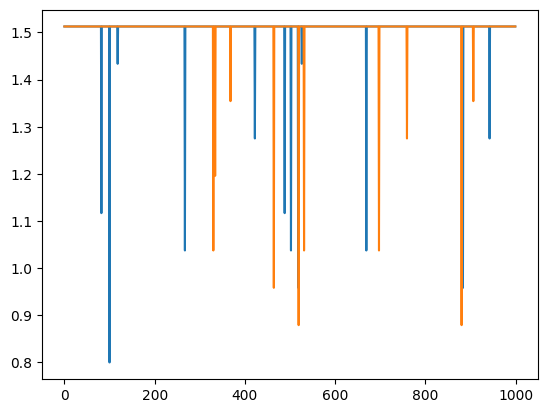

In [111]:
import matplotlib.pyplot as plt
plt.plot(p1_history[-1000:])
plt.plot(p2_history[-1000:])
plt.show()

In [109]:
def boltzmann_action_probs(Q, state, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state])
    logits = (Q[state] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    return probs

np.round(boltzmann_action_probs(Q1, state1, temperature),2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [110]:
np.round(boltzmann_action_probs(Q2, state1, temperature),2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])